In [1]:
from comet_ml import Experiment

In [2]:
from comet_ml import Experiment
experiment = Experiment(
  api_key = "gFC2BZfeX7KSnZwINu6BF7IcJ",
  project_name = "explore-hackathon",
  workspace="deolabeeb"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/deolabeeb/explore-hackathon/de6885a1fb134b63af45a8a38242b852



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve, f1_score, roc_auc_score,
                             classification_report)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle as pk
import joblib as jb
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv("data/cleaned_data.csv")

In [5]:
df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,dha iya kuba nobulumko bokubeka umsebenzi naph...
2,eng,province kwazulunatal department transport inv...
3,nso,netefatša gore file dilo moka tše dumelelanego...
4,ven,khomishini ndinganyiso mbeu ewa maana nga mula...


In [6]:
X = df_train['text']
y = df_train['lang_id']

# Grid search for Multinomial Naive Bayes

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['lang_id'], test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Values to try for the alpha parameter
    'fit_prior': [True, False]  # Values to try for the fit_prior parameter
}

# Create the grid search object
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_vectorized, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'alpha': 0.1, 'fit_prior': False}
Best Score: 0.9992207792207791


In [10]:

# Create and train the Multinomial Naive Bayes classifier with best parameters
naive_bayes = MultinomialNB(alpha=0.1, fit_prior=False)
naive_bayes.fit(X_train_vectorized, y_train)

# Evaluate the classifier on the test set
X_test_vectorized = vectorizer.transform(X_test)
accuracy = naive_bayes.score(X_test_vectorized, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.998989898989899


In [11]:
# Make predictions on the test data
y_pred = naive_bayes.predict(X_test_vectorized)

In [12]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)

Precision: 0.9989912534870219
Recall: 0.998989898989899
F1 score: 0.9989896522445352


Confusion Matrix:
[[895   0   0   0   0   0   0   0   0   0   0]
 [  0 909   0   0   0   0   0   0   0   0   0]
 [  0   0 878   0   0   0   0   0   0   1   0]
 [  0   0   0 939   2   0   0   0   0   0   0]
 [  0   0   0   0 918   0   0   0   0   0   0]
 [  0   0   0   0   0 908   0   0   0   0   0]
 [  1   0   0   1   0   0 880   0   0   0   0]
 [  0   0   0   0   0   0   0 857   0   0   0]
 [  0   0   0   0   0   0   0   0 936   0   0]
 [  0   0   1   0   0   0   0   0   0 921   0]
 [  0   1   2   0   0   1   0   0   0   0 849]]


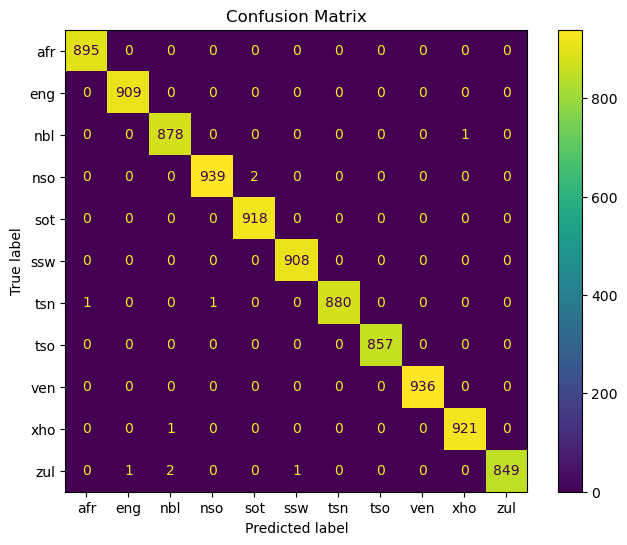

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_).plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()


In [14]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       895
         eng       1.00      1.00      1.00       909
         nbl       1.00      1.00      1.00       879
         nso       1.00      1.00      1.00       941
         sot       1.00      1.00      1.00       918
         ssw       1.00      1.00      1.00       908
         tsn       1.00      1.00      1.00       882
         tso       1.00      1.00      1.00       857
         ven       1.00      1.00      1.00       936
         xho       1.00      1.00      1.00       922
         zul       1.00      1.00      1.00       853

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



### Evaluate the test data

In [16]:
df_test = pd.read_csv("data/cleaned_test_data.csv")

In [17]:
# Convert text data into numerical representation
X_test_final = vectorizer.transform(df_test['text'])

# Make predictions on the test data
y_pred_test_5 = naive_bayes.predict(X_test_final)


In [27]:

# Create a DataFrame for submission
submission_5 = df_test[['index']].copy()
submission_5['lang_id'] = y_pred_test_5
submission_5.columns = ['index', 'lang_id']

# Save the submission DataFrame to a CSV file
submission_5.to_csv('data/submission_5.csv', index=False)

In [28]:
submission_5

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


In [23]:
# Save the trained model
joblib.dump(naive_bayes, 'data/trained_GRID_KNN_model.pkl')

['data/trained_GRID_KNN_model.pkl']

In [24]:
# Log the metrics to Comet
experiment.log_metric('accuracy', accuracy)
experiment.log_metric('precision', precision)
experiment.log_metric('recall', recall)
experiment.log_metric('f1_score', f1)

# Log the confusion matrix

experiment.log_image('confusion_matrix', 'confusion_matrix.png')

# Log the classification report
experiment.log_text('classification_report', classification_rep)

COMET ERROR: We failed to read file confusion_matrix for uploading.
Please double-check the file path and permissions
COMET WARNING: Passed step value '              precision    recall  f1-score   support\n\n         afr       1.00      1.00      1.00       895\n         eng       1.00      1.00      1.00       909\n         nbl       1.00      1.00      1.00       879\n         nso       1.00      1.00      1.00       941\n         sot       1.00      1.00      1.00       918\n         ssw       1.00      1.00      1.00       908\n         tsn       1.00      1.00      1.00       882\n         tso       1.00      1.00      1.00       857\n         ven       1.00      1.00      1.00       936\n         xho       1.00      1.00      1.00       922\n         zul       1.00      1.00      1.00       853\n\n    accuracy                           1.00      9900\n   macro avg       1.00      1.00      1.00      9900\nweighted avg       1.00      1.00      1.00      9900\n' is not a number, 

{'web': 'https://www.comet.com/api/asset/download?assetId=28e5c9ebbab443a5a6a20ef975d17c87&experimentKey=de6885a1fb134b63af45a8a38242b852',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=28e5c9ebbab443a5a6a20ef975d17c87&experimentKey=de6885a1fb134b63af45a8a38242b852',
 'assetId': '28e5c9ebbab443a5a6a20ef975d17c87'}

In [25]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/deolabeeb/explore-hackathon/de6885a1fb134b63af45a8a38242b852
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.998989898989899
COMET INFO:     f1_score  : 0.9989896522445352
COMET INFO:     precision : 0.9989912534870219
COMET INFO:     recall    : 0.998989898989899
COMET INFO:   Parameters:
COMET INFO:     alpha                  : 0.1
COMET INFO:     class_prior            : 1
COMET INFO:     cv                     : 5
COMET INFO:     error_score            : nan
COMET INFO:     estimator              : MultinomialNB()
COMET INFO:     estimator__alpha       : 1.0
COMET INFO:     estimator__class_prior : 1
COMET INFO:     est

In [26]:
experiment.display()